In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from PIL import Image
import imageio
import pickle
import pandas as pd
import os
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
record_timestamp = '20240510_185442'

In [4]:
with open("features.pkl", "rb") as f:
    df_features = pickle.load(f)
nd_features = df_features.values

nd_features.shape

(35133, 6)

In [5]:
# read iterations
with open(f"output/{record_timestamp}/{record_timestamp}_analysis_population.pkl", "rb") as f:
    df_iterations = pickle.load(f)

df_iterations.describe()

,p1,p2,p3,p4,p5,p6,score,pop,iteration,path_id
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.0,30000.00000,30000.00000,30000.0
mean,0.123439,0.493123,0.141869,0.576234,0.255594,6.227587e-02,-1.0,76.50000,74.50000,0.0
std,0.102497,0.154644,0.082037,0.120783,0.130376,1.098412e-01,0.0,43.30103,43.30103,0.0
min,0.000176,0.000000,0.000000,0.158437,0.003491,6.395629e-08,-1.0,2.00000,0.00000,0.0
25%,0.047841,0.387989,0.090179,0.492166,0.163208,4.473578e-03,-1.0,39.00000,37.00000,0.0
50%,0.094652,0.500915,0.126975,0.578714,0.231708,1.756303e-02,-1.0,76.50000,74.50000,0.0
75%,0.172597,0.610839,0.181977,0.661772,0.327345,6.750096e-02,-1.0,114.00000,112.00000,0.0
max,0.990355,0.923593,0.738163,0.966322,0.962881,9.753963e-01,-1.0,151.00000,149.00000,0.0


In [ ]:
######## comment out

for iteration in df_iterations.iteration.unique()[:1]:
    df_epoch = df_iterations[df_iterations.iteration == iteration]
    df_epoch = df_epoch[["p1", "p2", "p3", "p4", "p5", "p6"]]
    
df_epoch.describe()

In [6]:
# Scale the features
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(nd_features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42).fit(nd_features)
labels = kmeans.labels_

# Save the DataFrame with cluster labels
df_features["cluster"] = labels
with open("features_clustered_TEST.pkl", "wb") as f:
    pickle.dump(df_features, f)
###

# print(df_features.head())
# print(df_features.describe())
print(df_features.cluster.value_counts())

c:\Users\emin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
0    9759
1    9299
3    7964
4    7002
2    1109
Name: count, dtype: int64


In [ ]:
#### comment out

# find visited indexes
visited_indexes = []
for individual in df_epoch.values:
    for index, feature in enumerate(nd_features):
        if np.array_equal(individual, feature):
            visited_indexes.append(index)
            break
visited_indexes = np.array(visited_indexes)

visited_indexes

'end'

<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

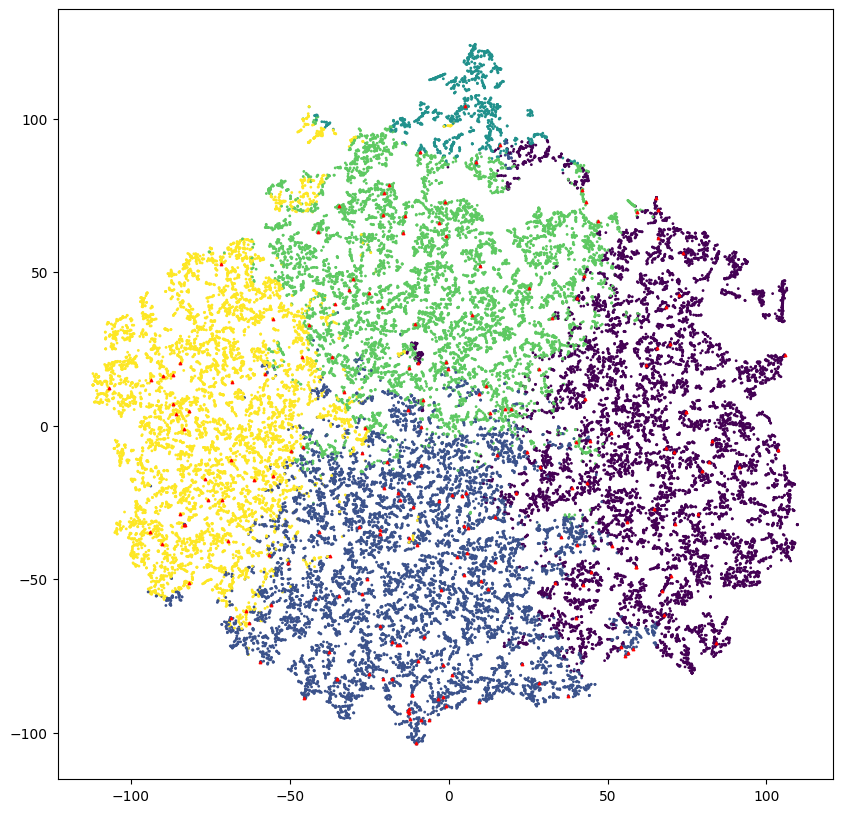

In [7]:
# VISUALIZE THE CLUSTERS (2D) with t-SNE
tsne = TSNE(n_components=2, random_state=0)
features_data_tsne = tsne.fit_transform(nd_features)
df_tsne = pd.DataFrame(features_data_tsne, columns=["x", "y"])

output_dir = f"output/{record_timestamp}/clusters"
os.makedirs(output_dir, exist_ok=True)

figure_filenames = []
for i, iteration in enumerate(df_iterations.iteration.unique()[:10]):
    df_epoch = df_iterations[df_iterations.iteration == iteration]
    df_epoch = df_epoch[["p1", "p2", "p3", "p4", "p5", "p6"]]
    
    # find visited indexes
    visited_indexes = []
    for individual in df_epoch.values:
        for index, feature in enumerate(nd_features):
            if np.array_equal(individual, feature):
                visited_indexes.append(index)
                break
    visited_indexes = np.array(visited_indexes)

    df_tsne["cluster"] = labels

    plt.clf()
    plt.figure(figsize=(10, 10))
    plt.scatter(df_tsne["x"], df_tsne["y"], s=1, c=df_tsne["cluster"], cmap="viridis")
    plt.scatter(df_tsne["x"].iloc[visited_indexes], df_tsne["y"].iloc[visited_indexes], c="red", s=3, marker="^")
    # plt.show()

    output_file = os.path.join(output_dir, f"generation_{i}.png")
    plt.savefig(output_file)
    figure_filenames.append(output_file)

"end"

In [8]:
# make a gif

# Load each figure and append it to the images list
images = []
for filename in figure_filenames:
    image = Image.open(filename)
    images.append(image)

# Save the images as a GIF
output_filename = os.path.join(output_dir, "evolution_anim.gif")
imageio.mimsave(output_filename, images, duration=0.1)

# Remove the individual figure files
# for filename in figure_filenames:
#     os.remove(filename)

In [13]:
# VISUALIZE THE CLUSTERS (3D) with t-SNE
tsne = TSNE(n_components=3, random_state=0)
features_data_tsne = tsne.fit_transform(nd_features)

df_tsne = pd.DataFrame(features_data_tsne, columns=["x", "y", "z"])
df_tsne["cluster"] = labels

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    df_tsne["x"], df_tsne["y"], df_tsne["z"], c=df_tsne["cluster"], cmap="viridis"
)
plt.show()
plt.savefig("clusters_3d_TEST.png")


KeyboardInterrupt: 